In [23]:
from sklearn import model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline 
%config InlineBackend.figure_format="retina" 

In [48]:
class RBF():
    # 权值及偏置初始化
    # 注意是单层RBF
    def __init__(self):
        self.hideNum=4
        self.epoch=10000
    
        self.w = np.random.rand(self.hideNum,1)
        self.beta = np.random.rand(self.hideNum,1)
        self.c=np.random.rand(self.hideNum,2)   #中心
        
    def forward(self,X):
        self.X=X
        self.dist=np.sum((X-self.c)**2,axis=1,keepdims=True)
        # 高斯径向基
        self.rho=np.exp(-self.beta*self.dist)# 注意径向基为激活函数，相当于BP的sigmoid
        self.y=self.w.T.dot(self.rho)
        # w第一位代表w_b,所以y第一位代表预测值
        return self.y[0, 0]
        
        
    # 梯度下降
    # 通过y回退
    def grad(self,y):
        grad_y=self.y-y
        grad_w=grad_y*self.rho
        grad_rho=grad_y*self.w
        grad_beta=-grad_rho*self.rho*self.dist
        grad_c=grad_rho*self.rho*2*self.beta*(self.X-self.c)
        self.grads = [grad_w, grad_beta, grad_c]
        
    # 参数更新
    def update(self,eta=0.01):
        self.w-=eta*self.grads[0]
        self.beta-=eta*self.grads[1]
        self.c-=eta*self.grads[2]
    
    def loss(self,X,y):
        y_=self.forward(X)
        loss=0.5*(y_-y)**2
        return loss
    
    def train(self,X,y):
        losses=[]
        for e in range(self.epoch):
            loss=0
            for i in range(len(X)):
                self.forward(X[i])
                self.grad(y[i])
                self.update()
                loss+=self.loss(X[i],y[i])
                
            losses.append(loss)
        return losses
    

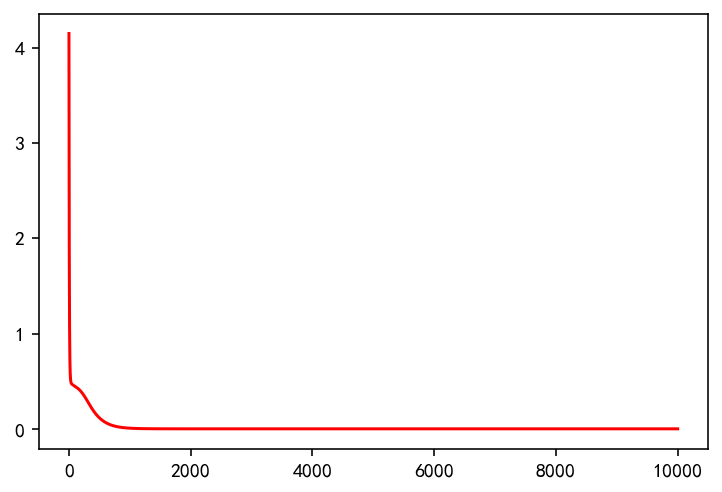

X: [0, 0] y: [0] res: 0
X: [0, 1] y: [1] res: 1
X: [1, 0] y: [1] res: 1
X: [1, 1] y: [0] res: 0


In [53]:
if __name__ == '__main__':
    
    train_X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # 异或训练集
    train_y = [[0], [1], [1], [0]]  # 异或输出
   

    #training
    net = RBF()
    losses = net.train(train_X, train_y)
    plt.plot(range(len(losses)), losses, 'r-')
    plt.show()

    #predict
    predicts = []
    for i in range(4):
        predict = net.forward(train_X[i])
        if predict<1-predict:
            predict=0
        else:
            predict=1
        print("X:",train_X[i],"y:",train_y[i],"res:",predict)